<a href="https://colab.research.google.com/github/ori112/mushrooms_predictions/blob/main/mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#importing required packages
#pip install shap
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
#reading project file
df = pd.read_csv(r'/content/mushrooms.csv')

In [ ]:
#inspecting the head
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#inspecting info, nulls and duplicats

print(df.isnull().sum())
print("--------------")
print(df.duplicated().sum())
print("--------------")
df.info()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
--------------
0
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   obj

#data preping for model

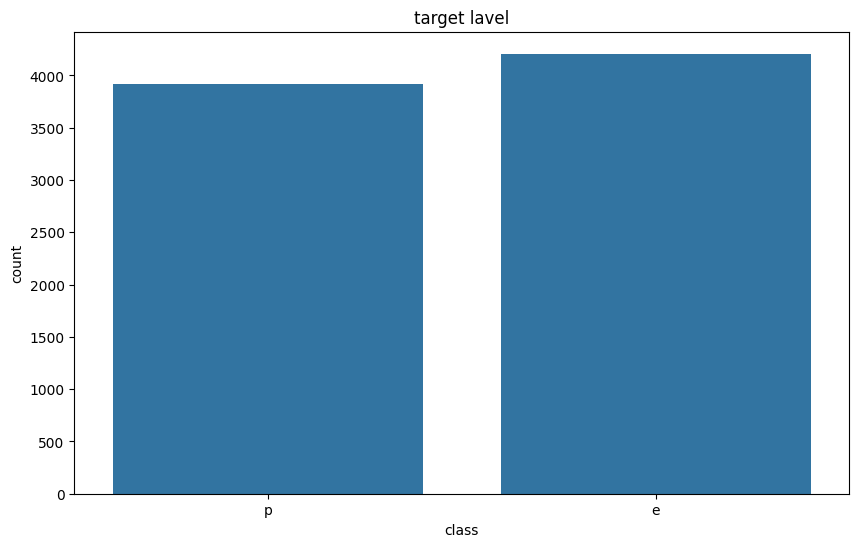

In [ ]:
#exploring the target label "class"

plt.figure(figsize=(10,6))
sns.countplot(data=df,x="class")
plt.title("target lavel")
plt.show()

In [ ]:
#label encoding
le = LabelEncoder()

for i in df.columns:
  df[i] = le.fit_transform(df[i])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


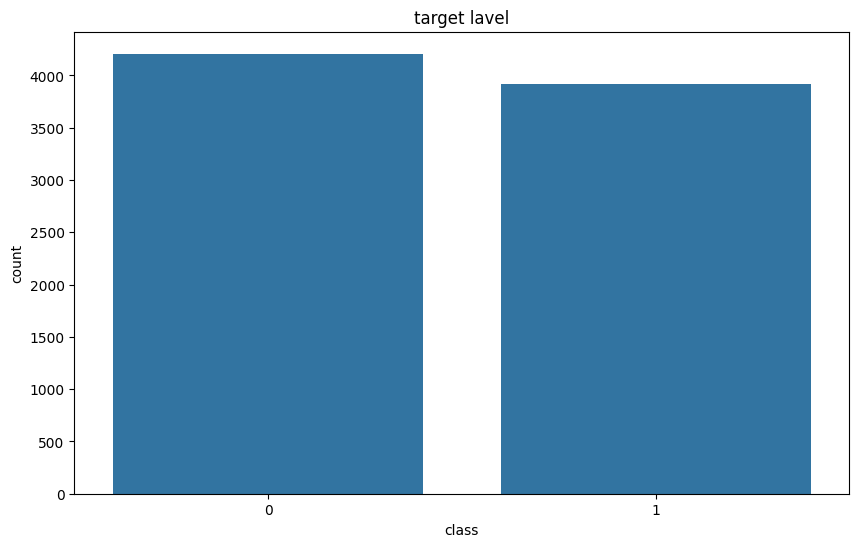

In [ ]:
#exploring the target label "class"

plt.figure(figsize=(10,6))
sns.countplot(data=df,x="class")
plt.title("target lavel")
plt.show()

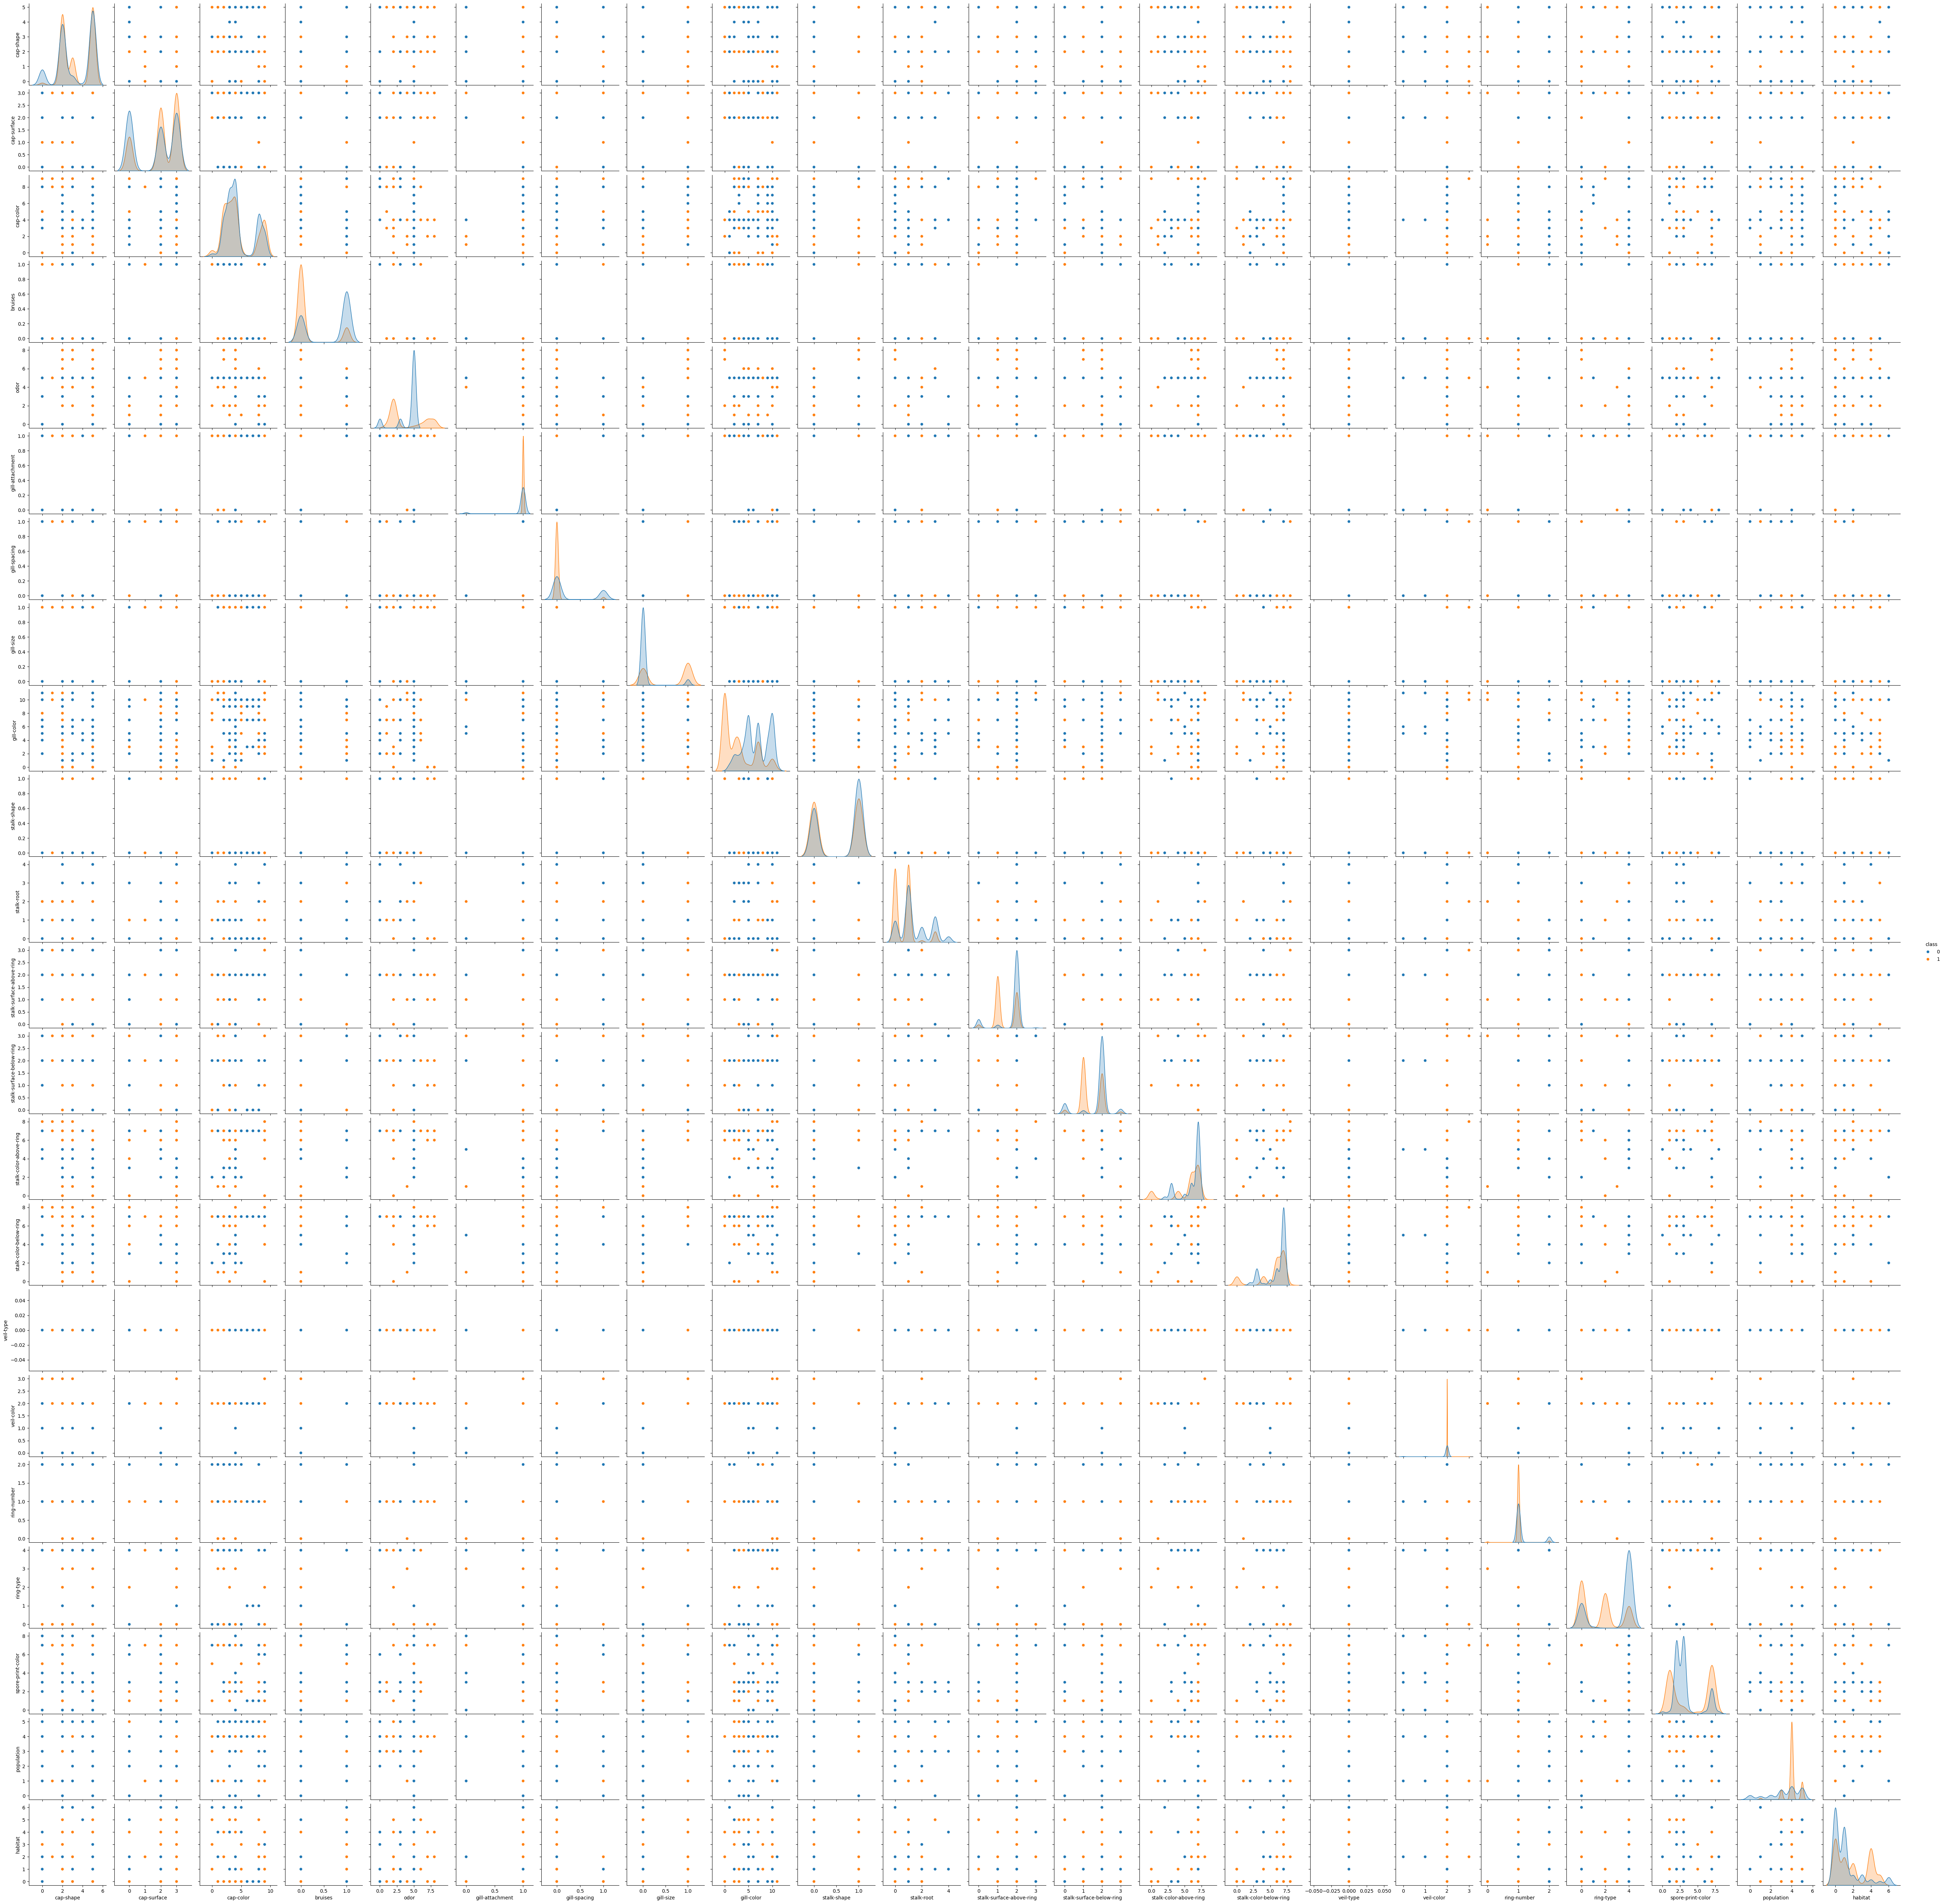

In [ ]:
sns.pairplot(data=df, hue = "class")

In [ ]:
#features and target seperation

X = df.drop(columns=["class"])
y = df["class"]

#splitting the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#inspecting the shapes of the datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6499, 22)
(1625, 22)
(6499,)
(1625,)


#Decision Tree

In [ ]:
#initializing and training model
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [ ]:
#inspecting classification_report
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_clf))

[[843   0]
 [  0 782]]


In [ ]:
#creating param_grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
#creating GridSearchCV and training
clf_grid = GridSearchCV(estimator = clf, param_grid= param_grid, cv=5, scoring="accuracy")
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
#retriving best params and model
clf_best_model = clf_grid.best_estimator_
clf_best_params = clf_grid.best_params_

In [ ]:
#checking best_params
print(clf_best_params)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
#predicting with best model
pred_clf_best = clf_best_model.predict(X_test)

In [ ]:
#inspecting classification report
print(classification_report(y_test, pred_clf_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_clf_best))

[[843   0]
 [  0 782]]


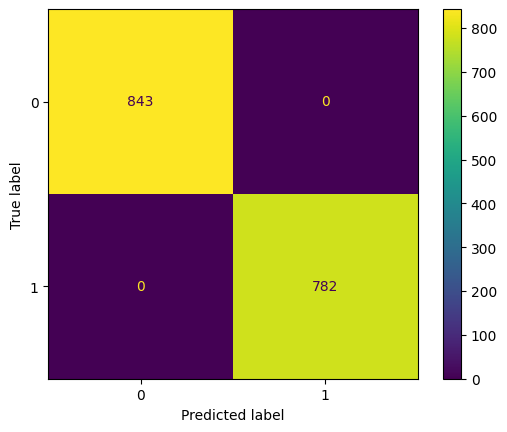

In [ ]:
#visualizing confusion_matrix

matrix = confusion_matrix(y_test, pred_clf_best)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
#calculating positive probabilities
y_score = clf_best_model.predict_proba(X_test)[:, 1]

#calculating FPR, TPR and auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

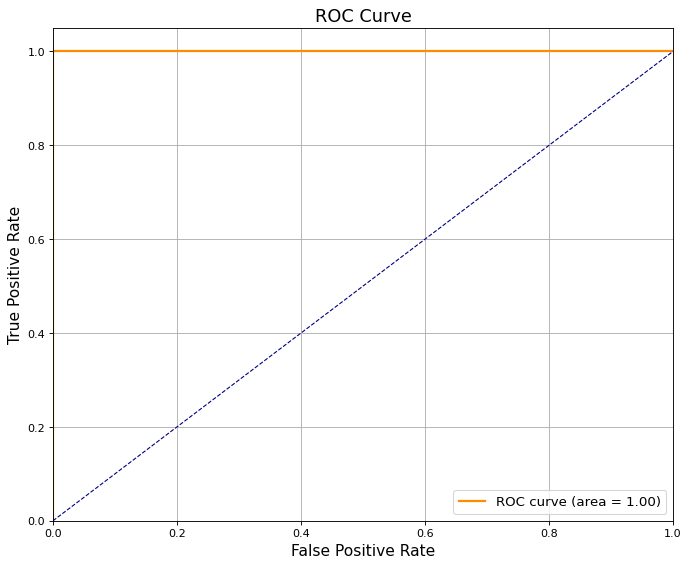

In [ ]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

#Random Forest

In [ ]:
#initializing and training model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
#inspecting classification_report
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#inspecting confusion_matrix
print(confusion_matrix(y_test,pred_rfc))

[[843   0]
 [  0 782]]


In [ ]:
#creating param_grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
#creating GridSearchCV and training
rfc_grid = GridSearchCV(estimator = rfc, param_grid= param_grid, cv=5, scoring="accuracy")
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
#retring best model and params
rfc_best_model = rfc_grid.best_estimator_
rfc_best_params = rfc_grid.best_params_

In [ ]:
#inspecting best_params
print(rfc_best_params)

{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
#predicing with the best model
pred_rfc_best_model = rfc_best_model.predict(X_test)

In [ ]:
#inspecting classification_report
print(classification_report(y_test, pred_rfc_best_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_rfc_best_model))

[[843   0]
 [  0 782]]


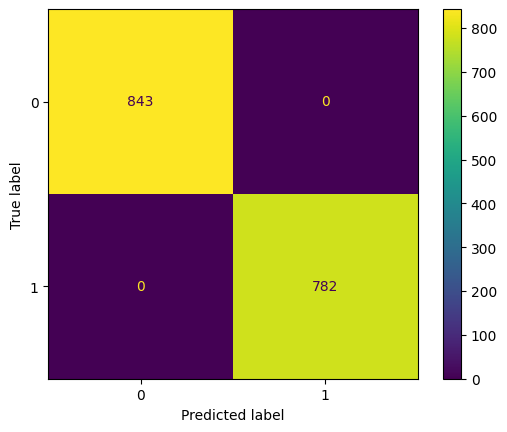

In [ ]:
#visualizing confusion_matrix

matrix = confusion_matrix(y_test, pred_rfc_best_model)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
#calculating positive probabilities
y_score = rfc_best_model.predict_proba(X_test)[:, 1]

#calculating FPR, TPR and auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

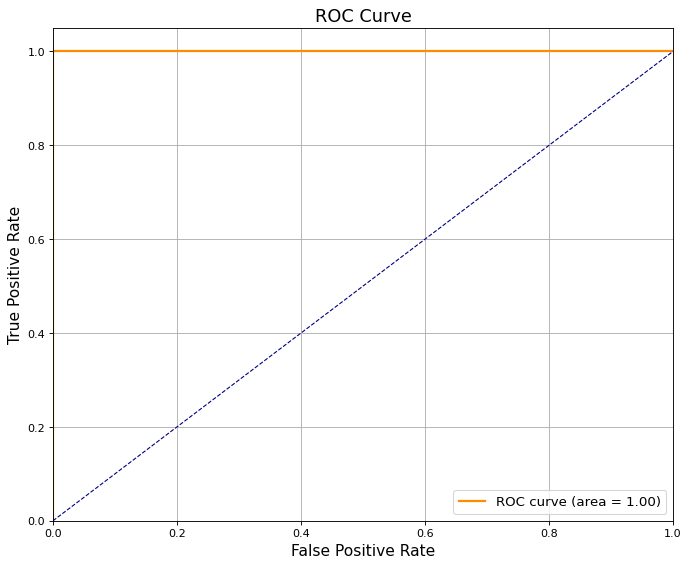

In [ ]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

#Support Vector

In [ ]:
#initializing and training model
svm = svm.SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

In [ ]:
#inspecting classification_report
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [ ]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_svm))

[[842   1]
 [ 11 771]]


In [ ]:
#creating param_grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

In [ ]:
#creating GridSearchCV and training
svm_grid = GridSearchCV(estimator = svm, param_grid= param_grid, cv=5, scoring="accuracy")
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
#retring best model and params
svm_best_model = svm_grid.best_estimator_
svm_best_params = svm_grid.best_params_

In [ ]:
#inspecting best_params
print(svm_best_params)

{'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
#predicing with the best model
pred_svm_best_model = svm_best_model.predict(X_test)

In [ ]:
#inspecting classification_report
print(classification_report(y_test, pred_svm_best_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_svm_best_model))

[[843   0]
 [  0 782]]


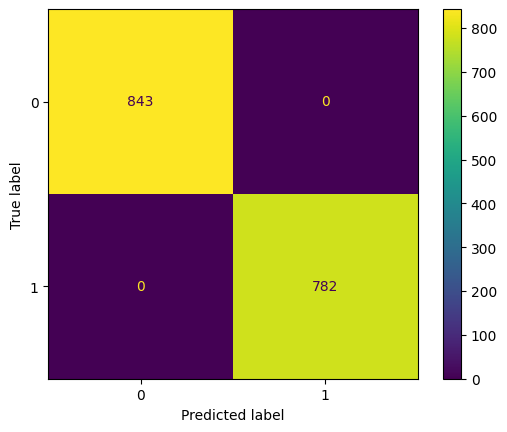

In [ ]:
#visualizing confusion_matrix

matrix = confusion_matrix(y_test, pred_svm_best_model)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

#KNN

In [ ]:
#initializing and training model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [ ]:
#inspecting classification_report
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#inspecting confusion_matrix
print(confusion_matrix(y_test,pred_knn))

[[837   6]
 [  0 782]]


In [ ]:
#creating param_grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

In [ ]:
#creating GridSearchCV and training
knn_grid = GridSearchCV(estimator = knn, param_grid= param_grid, cv=5, scoring="accuracy")
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
#retring best model and params
knn_best_model = knn_grid.best_estimator_
knn_best_params = knn_grid.best_params_

In [ ]:
#inspecting best_params
print(knn_best_params)

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [ ]:
#predicing with the best model
pred_knn_best_model = knn_best_model.predict(X_test)

In [ ]:
#inspecting classification_report
print(classification_report(y_test, pred_knn_best_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_knn_best_model))

[[843   0]
 [  0 782]]


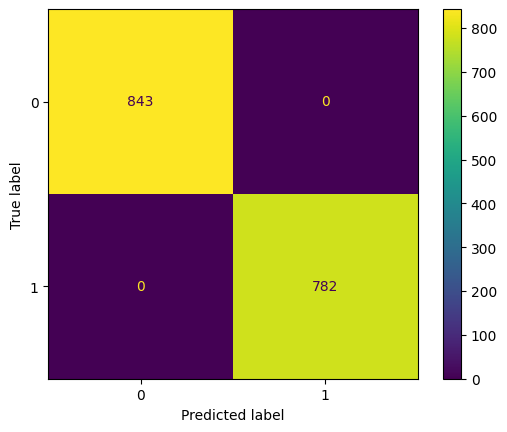

In [ ]:
#visualizing confusion_matrix

matrix = confusion_matrix(y_test, pred_knn_best_model)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
#calculating positive probabilities
y_score = knn_best_model.predict_proba(X_test)[:, 1]

#calculating FPR, TPR and auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

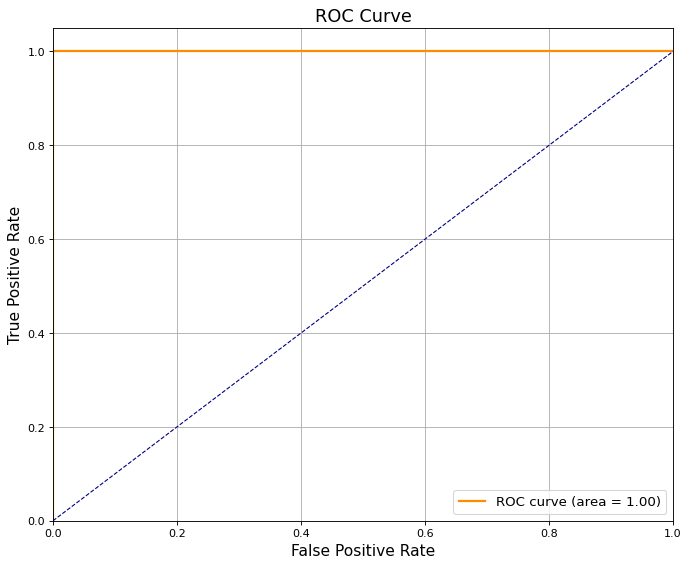

In [ ]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

#Logistic Regression

In [ ]:
#initializing and training model
lr = lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

In [ ]:
#inspecting classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [ ]:
#inspecting confusion_matrix
print(confusion_matrix(y_test,pred_lr))

[[798  45]
 [ 41 741]]


In [ ]:
#creating param_grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000,2000,3000]
}

In [ ]:
#creating GridSearchCV and training
lr_grid = GridSearchCV(estimator = lr, param_grid= param_grid, cv=5, scoring="accuracy")
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
#retring best model and params
lr_best_model = lr_grid.best_estimator_
lr_best_params = lr_grid.best_params_

In [ ]:
#inspecting best_params
print(lr_best_params)

{'C': 100, 'max_iter': 3000, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
#predicing with the best model
pred_lr_best_model = lr_best_model.predict(X_test)

In [ ]:
#inspecting classification_report
print(classification_report(y_test, pred_lr_best_model))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       843
           1       0.96      0.97      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



In [ ]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_lr_best_model))

[[810  33]
 [ 22 760]]


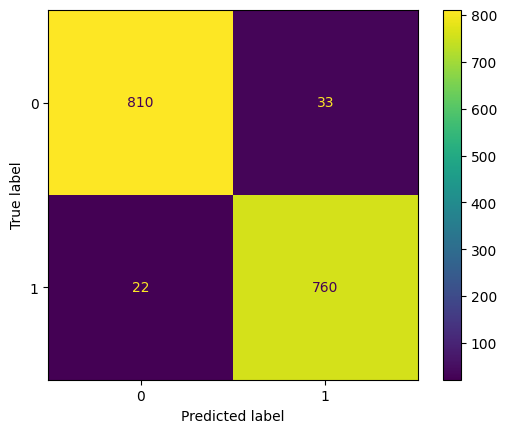

In [ ]:
#visualizing confusion_matrix

matrix = confusion_matrix(y_test, pred_lr_best_model)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
#calculating positive probabilities
y_score = lr_best_model.predict_proba(X_test)[:, 1]

#calculating FPR, TPR and auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

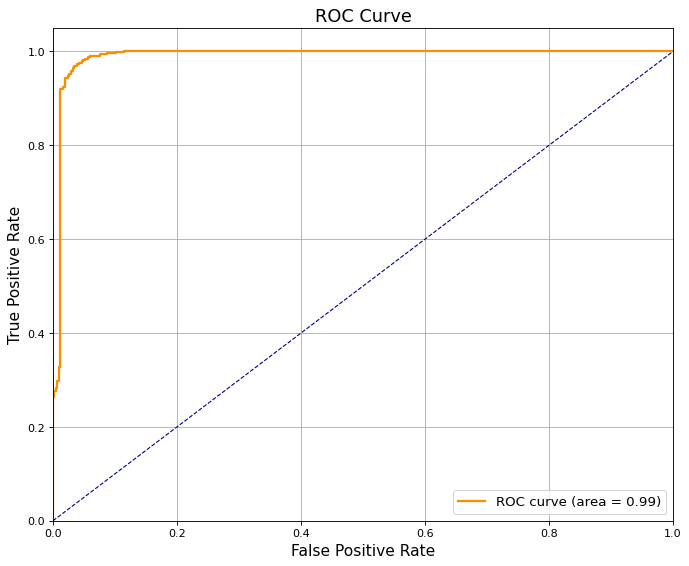

In [ ]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

#Decision tree inspection

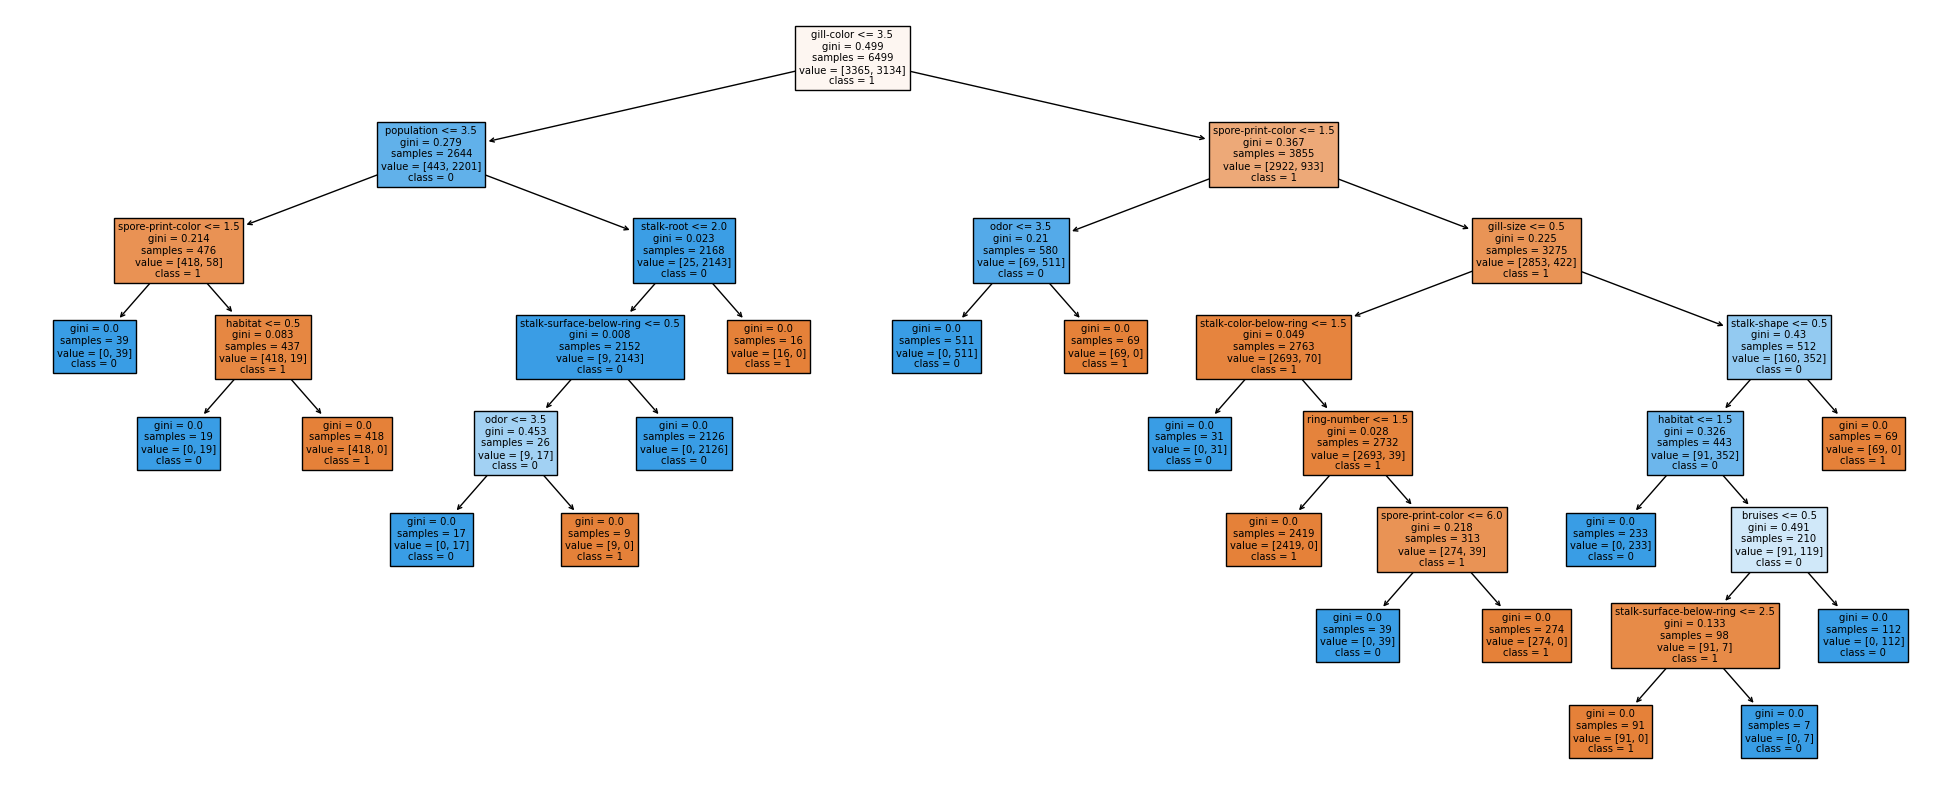

In [65]:
plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, feature_names=X.columns, class_names=y.astype(str), filled=True)
plt.show()
